# Chargement des données

In [1]:
from datasets import load_dataset

ds = load_dataset("SetFit/ag_news")

/home/simo/Desktop/Projects/News-Classifier/News-Classifier/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Conversion des données en DataFrame pandas

In [2]:
train_df = ds['train'].to_pandas()
test_df = ds['test'].to_pandas()

# Réalisation d’une analyse exploratoire des données (EDA)

In [3]:
print(f'les dimensions de l\'ensemble d\'entrainement sont: {train_df.shape}')
print(f'les dimensions de l\'ensemble d\'entrainement sont: {test_df.shape}')

les dimensions de l'ensemble d'entrainement sont: (120000, 3)
les dimensions de l'ensemble d'entrainement sont: (7600, 3)


In [4]:
print(train_df.head())
print(test_df.head())

                                                text  label label_text
0  Wall St. Bears Claw Back Into the Black (Reute...      2   Business
1  Carlyle Looks Toward Commercial Aerospace (Reu...      2   Business
2  Oil and Economy Cloud Stocks' Outlook (Reuters...      2   Business
3  Iraq Halts Oil Exports from Main Southern Pipe...      2   Business
4  Oil prices soar to all-time record, posing new...      2   Business
                                                text  label label_text
0  Fears for T N pension after talks Unions repre...      2   Business
1  The Race is On: Second Private Team Sets Launc...      3   Sci/Tech
2  Ky. Company Wins Grant to Study Peptides (AP) ...      3   Sci/Tech
3  Prediction Unit Helps Forecast Wildfires (AP) ...      3   Sci/Tech
4  Calif. Aims to Limit Farm-Related Smog (AP) AP...      3   Sci/Tech


In [5]:
print('distribution des labels dans l\'ensemble d\'entrainement:\n')
print(f'{train_df['label'].value_counts()}\n')
print(f'{train_df['label_text'].value_counts()}\n')
print('distribution des labels dans l\'ensemble de test:\n')
print(f'{test_df['label'].value_counts()}\n')
print(f'{test_df['label_text'].value_counts()}\n')

distribution des labels dans l'ensemble d'entrainement:

label
2    30000
3    30000
1    30000
0    30000
Name: count, dtype: int64

label_text
Business    30000
Sci/Tech    30000
Sports      30000
World       30000
Name: count, dtype: int64

distribution des labels dans l'ensemble de test:

label
2    1900
3    1900
1    1900
0    1900
Name: count, dtype: int64

label_text
Business    1900
Sci/Tech    1900
Sports      1900
World       1900
Name: count, dtype: int64



In [6]:
print('Colonnes:\n')
print(train_df.columns)
print(test_df.columns)

Colonnes:

Index(['text', 'label', 'label_text'], dtype='object')
Index(['text', 'label', 'label_text'], dtype='object')


In [7]:
print('Proportion de l\'ensemble de test:\n')
print(len(test_df)/(len(train_df) + len(test_df)) * 100)

Proportion de l'ensemble de test:

5.956112852664576


In [8]:
print(train_df.info())
print()
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   text        120000 non-null  object
 1   label       120000 non-null  int64 
 2   label_text  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        7600 non-null   object
 1   label       7600 non-null   int64 
 2   label_text  7600 non-null   object
dtypes: int64(1), object(2)
memory usage: 178.3+ KB
None


In [9]:
print(train_df.dtypes)
print(test_df.dtypes)

text          object
label          int64
label_text    object
dtype: object
text          object
label          int64
label_text    object
dtype: object


In [10]:
print("Nombres des valeurs nulles dans chaque colonne de l'ensemble d'entrainement:")
print(train_df.isnull().sum())
print()
print("Nombres des valeurs nulles dans chaque colonne de l'ensemble de test:")
print(test_df.isnull().sum())

Nombres des valeurs nulles dans chaque colonne de l'ensemble d'entrainement:
text          0
label         0
label_text    0
dtype: int64

Nombres des valeurs nulles dans chaque colonne de l'ensemble de test:
text          0
label         0
label_text    0
dtype: int64


In [11]:
print('Nombre des valeurs nulles dans l\'ensemble d\'entrainement:')
print(train_df.duplicated(subset=['text']).sum())
print()
print('Nombre des valeurs nulles dans l\'ensemble de test:')
print(test_df.duplicated(subset=['text']).sum())

Nombre des valeurs nulles dans l'ensemble d'entrainement:
0

Nombre des valeurs nulles dans l'ensemble de test:
0


In [12]:
print('Nombre d\'entrées vides dans l\'ensemble d\'entrainement:')
print((train_df['text'].str.strip() == '').sum())
print()
print('Nombre d\'entrées vides dans l\'ensemble de test:')
print((test_df['text'].str.strip() == '').sum())

Nombre d'entrées vides dans l'ensemble d'entrainement:
0

Nombre d'entrées vides dans l'ensemble de test:
0


In [13]:
print('tous les labels de l\'ensemble d\'entrainement:')
print(train_df['label_text'].unique())
print('tous les labels de l\'ensemble test:')
print(test_df['label_text'].unique())

tous les labels de l'ensemble d'entrainement:
['Business' 'Sci/Tech' 'Sports' 'World']
tous les labels de l'ensemble test:
['Business' 'Sci/Tech' 'Sports' 'World']


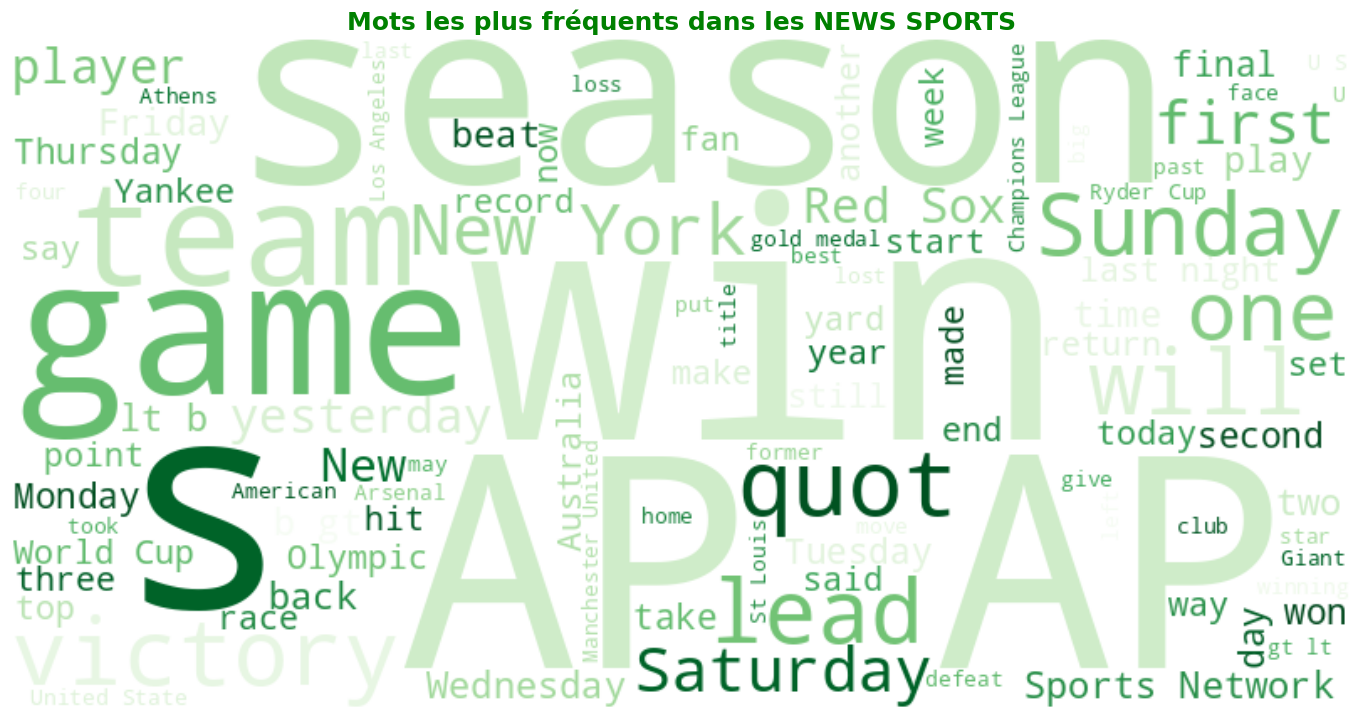


Nombre de mots dans les sports: 1133242


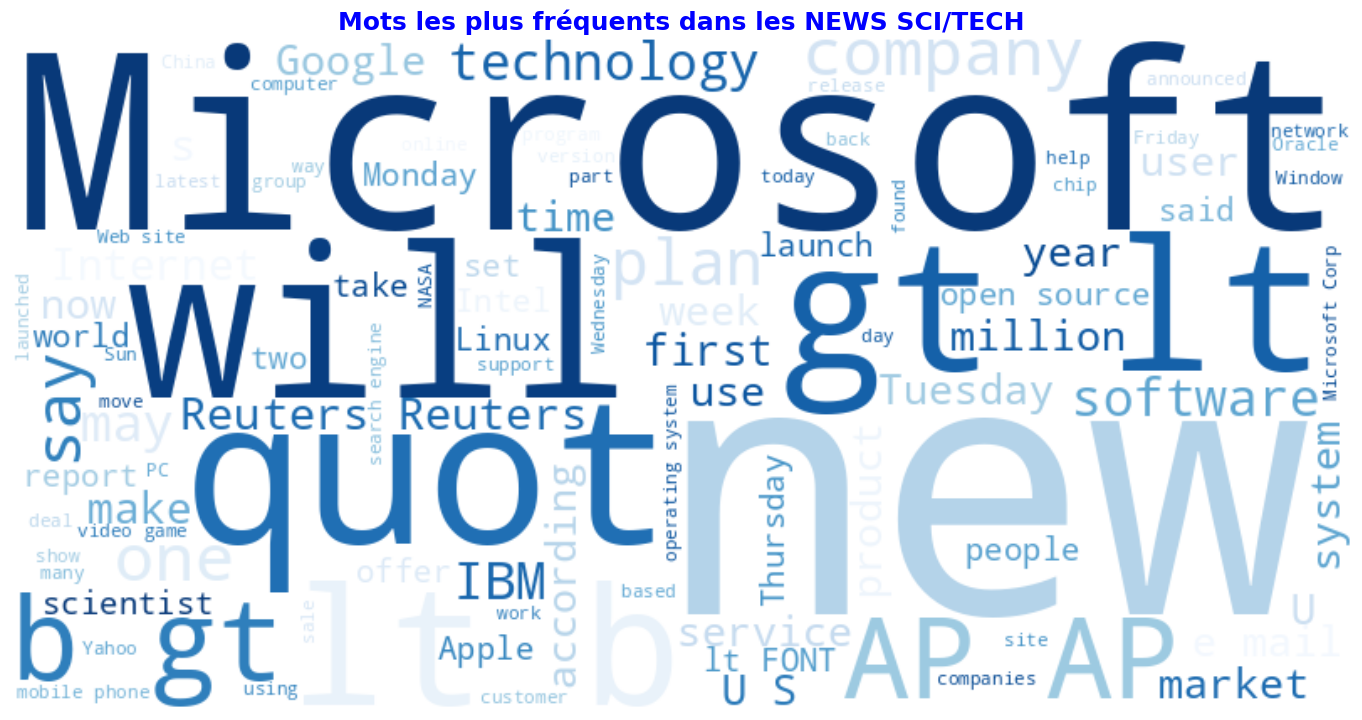


Nombre de mots dans les sci/tech: 1115759


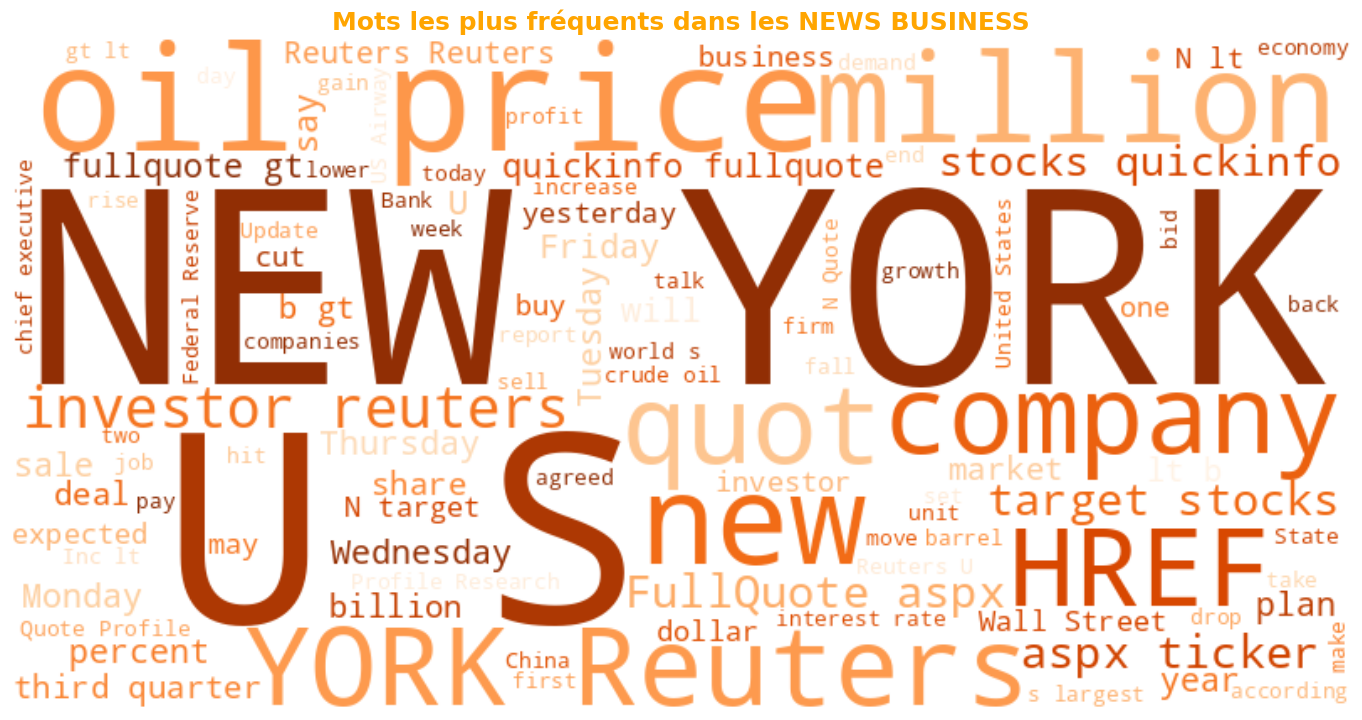


Nombre de mots dans les business: 1126147


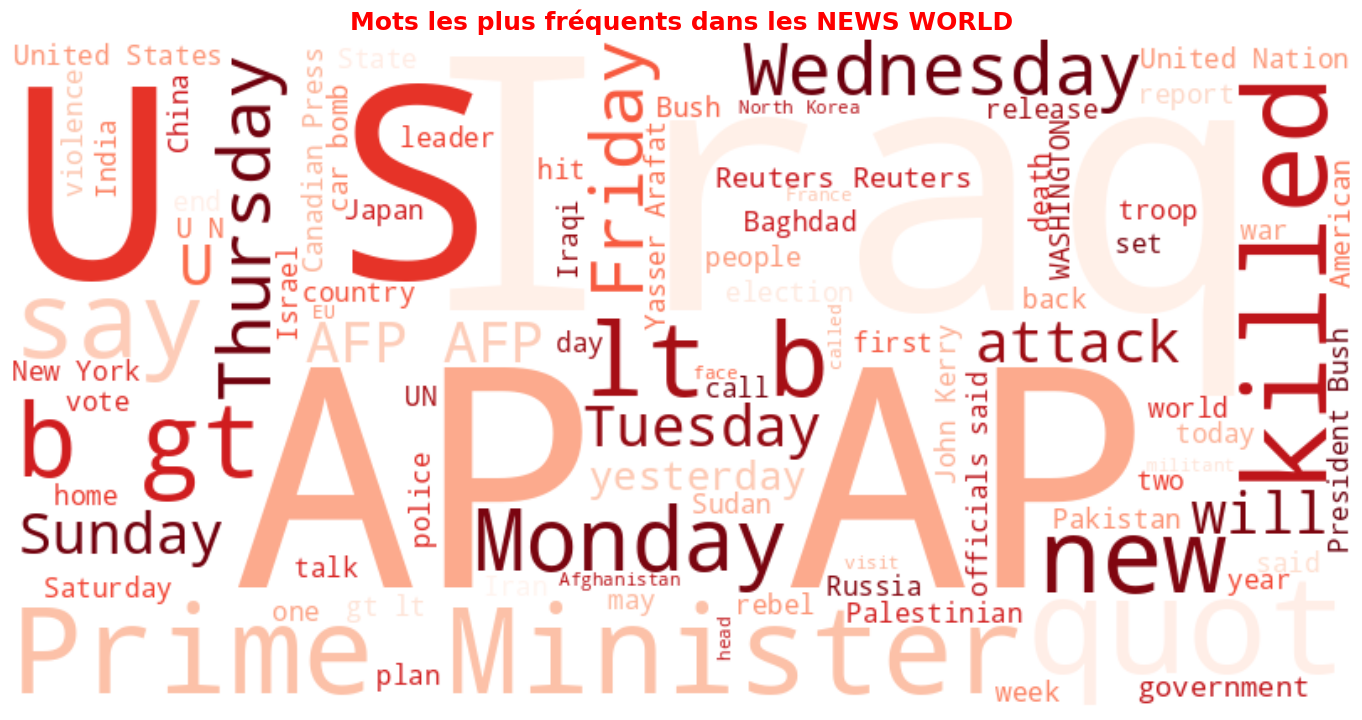


Nombre de mots dans les world: 1166546


In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

sports_text = ' '.join(train_df[train_df['label'] == 1]['text'].astype(str))
scitech_text = ' '.join(train_df[train_df['label'] == 3]['text'].astype(str))
business_text = ' '.join(train_df[train_df['label'] == 2]['text'].astype(str))
world_text = ' '.join(train_df[train_df['label'] == 0]['text'].astype(str))

wordcloud_sports = WordCloud(
    width=800, 
    height=400,
    background_color='white',
    colormap='Greens',
    max_words=100,
    relative_scaling=0.5,
    min_font_size=10
).generate(sports_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud_sports, interpolation='bilinear')
plt.title('Mots les plus fréquents dans les NEWS SPORTS', fontsize=18, fontweight='bold', color='green')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

print(f"\nNombre de mots dans les sports: {len(sports_text.split())}")

wordcloud_scitech = WordCloud(
    width=800, 
    height=400,
    background_color='white',
    colormap='Blues',
    max_words=100,
    relative_scaling=0.5,
    min_font_size=10
).generate(scitech_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud_scitech, interpolation='bilinear')
plt.title('Mots les plus fréquents dans les NEWS SCI/TECH', fontsize=18, fontweight='bold', color='blue')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

print(f"\nNombre de mots dans les sci/tech: {len(scitech_text.split())}")

wordcloud_business = WordCloud(
    width=800, 
    height=400,
    background_color='white',
    colormap='Oranges',
    max_words=100,
    relative_scaling=0.5,
    min_font_size=10
).generate(business_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud_business, interpolation='bilinear')
plt.title('Mots les plus fréquents dans les NEWS BUSINESS', fontsize=18, fontweight='bold', color='orange')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

print(f"\nNombre de mots dans les business: {len(business_text.split())}")

wordcloud_world = WordCloud(
    width=800, 
    height=400,
    background_color='white',
    colormap='Reds',
    max_words=100,
    relative_scaling=0.5,
    min_font_size=10
).generate(world_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud_world, interpolation='bilinear')
plt.title('Mots les plus fréquents dans les NEWS WORLD', fontsize=18, fontweight='bold', color='red')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

print(f"\nNombre de mots dans les world: {len(world_text.split())}")

# Pretraitement du texte

In [15]:
train_df['text'] = train_df['text'].str.lower()
test_df['text'] = test_df['text'].str.lower()

In [16]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """
    Fonction de prétraitement du texte:
    1. Suppression de la ponctuation et caractères spéciaux (garde seulement lettres et espaces)
    2. Tokenisation
    3. Suppression des stopwords
    """
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    tokens = word_tokenize(text)
    
    processed_tokens = [
        token 
        for token in tokens 
        if token not in stop_words and len(token) > 2
    ]
    
    return ' '.join(processed_tokens)

print("Exemple de texte AVANT prétraitement:")
print(train_df['text'].iloc[0])
print()

print("Application du prétraitement...")
train_df['text_processed'] = train_df['text'].apply(preprocess_text)
test_df['text_processed'] = test_df['text'].apply(preprocess_text)

print("\nExemple de texte APRÈS prétraitement:")
print(train_df['text_processed'].iloc[0])
print()

print(f"Dimensions AVANT suppression des doublons:")
print(f"  Ensemble d'entraînement: {train_df.shape}")
print(f"  Ensemble de test: {test_df.shape}")
print()

train_df = train_df.drop_duplicates(subset=['text_processed'], keep='first')
test_df = test_df.drop_duplicates(subset=['text_processed'], keep='first')

train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

print(f"Dimensions APRÈS suppression des doublons:")
print(f"  Ensemble d'entraînement: {train_df.shape}")
print(f"  Ensemble de test: {test_df.shape}")
print()

print("Aperçu des données prétraitées (train_df):")
print(train_df[['text', 'text_processed', 'label_text']].head())

[nltk_data] Downloading package stopwords to /home/simo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/simo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/simo/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Exemple de texte AVANT prétraitement:
wall st. bears claw back into the black (reuters) reuters - short-sellers, wall street's dwindling\band of ultra-cynics, are seeing green again.

Application du prétraitement...

Exemple de texte APRÈS prétraitement:
wall bears claw back black reuters reuters shortsellers wall streets dwindlingband ultracynics seeing green

Dimensions AVANT suppression des doublons:
  Ensemble d'entraînement: (120000, 4)
  Ensemble de test: (7600, 4)

Dimensions APRÈS suppression des doublons:
  Ensemble d'entraînement: (119241, 4)
  Ensemble de test: (7599, 4)

Aperçu des données prétraitées (train_df):
                                                text  \
0  wall st. bears claw back into the black (reute...   
1  carlyle looks toward commercial aerospace (reu...   
2  oil and economy cloud stocks' outlook (reuters...   
3  iraq halts oil exports from main southern pipe...   
4  oil prices soar to all-time record, posing new...   

                              

# Génération des embeddings à l’aide de Sentence Transformers

In [17]:
from sentence_transformers import SentenceTransformer
import numpy as np

model_name = 'paraphrase-multilingual-MiniLM-L12-v2'
print(f"Chargement du modèle: {model_name}")
model = SentenceTransformer(model_name)

print(f"Modèle chargé avec succès!")
print(f"Dimension des embeddings: {model.get_sentence_embedding_dimension()}")
print()

print("Génération des embeddings pour l'ensemble d'entraînement...")
train_embeddings = model.encode(
    train_df['text_processed'].tolist(),
    show_progress_bar=True,
    batch_size=32
)

print(f"Embeddings d'entraînement générés: {train_embeddings.shape}")
print()

print("Génération des embeddings pour l'ensemble de test...")
test_embeddings = model.encode(
    test_df['text_processed'].tolist(),
    show_progress_bar=True,
    batch_size=32
)

print(f"Embeddings de test générés: {test_embeddings.shape}")
print()

print("Exemple d'embedding (premiers 10 éléments):")
print(train_embeddings[0][:10])
print()

print("Statistiques des embeddings d'entraînement:")
print(f"  Moyenne: {np.mean(train_embeddings):.4f}")
print(f"  Écart-type: {np.std(train_embeddings):.4f}")
print(f"  Min: {np.min(train_embeddings):.4f}")
print(f"  Max: {np.max(train_embeddings):.4f}")

Chargement du modèle: paraphrase-multilingual-MiniLM-L12-v2
Modèle chargé avec succès!
Dimension des embeddings: 384

Génération des embeddings pour l'ensemble d'entraînement...


Batches: 100%|██████████| 3727/3727 [01:32<00:00, 40.35it/s]


Embeddings d'entraînement générés: (119241, 384)

Génération des embeddings pour l'ensemble de test...


Batches: 100%|██████████| 238/238 [00:05<00:00, 40.48it/s]


Embeddings de test générés: (7599, 384)

Exemple d'embedding (premiers 10 éléments):
[ 0.21602505  0.12176014  0.2241747   0.04468386  0.166735   -0.11223538
 -0.18754272 -0.27887404 -0.32707524 -0.14868152]

Statistiques des embeddings d'entraînement:
  Moyenne: 0.0001
  Écart-type: 0.1944
  Min: -1.2902
  Max: 1.4425


# Sauvegarde des métadonnées (identifiant et label)

In [18]:
import os

train_df['article_id'] = train_df.index
test_df['article_id'] = test_df.index

train_metadata = train_df[['article_id', 'label', 'label_text']].copy()
test_metadata = test_df[['article_id', 'label', 'label_text']].copy()

os.makedirs('metadata', exist_ok=True)

train_metadata_path = 'metadata/train_metadata.csv'
test_metadata_path = 'metadata/test_metadata.csv'

train_metadata.to_csv(train_metadata_path, index=False)
test_metadata.to_csv(test_metadata_path, index=False)

print(f"Métadonnées d'entraînement sauvegardées dans: {train_metadata_path}")
print(f"Nombre d'articles d'entraînement: {len(train_metadata)}")
print()
print(f"Métadonnées de test sauvegardées dans: {test_metadata_path}")
print(f"Nombre d'articles de test: {len(test_metadata)}")
print()

print("Aperçu des métadonnées d'entraînement:")
print(train_metadata.head(10))
print()
print("Aperçu des métadonnées de test:")
print(test_metadata.head(10))
print()

print("Distribution des labels dans les métadonnées d'entraînement:")
print(train_metadata['label_text'].value_counts())
print()
print("Distribution des labels dans les métadonnées de test:")
print(test_metadata['label_text'].value_counts())

Métadonnées d'entraînement sauvegardées dans: metadata/train_metadata.csv
Nombre d'articles d'entraînement: 119241

Métadonnées de test sauvegardées dans: metadata/test_metadata.csv
Nombre d'articles de test: 7599

Aperçu des métadonnées d'entraînement:
   article_id  label label_text
0           0      2   Business
1           1      2   Business
2           2      2   Business
3           3      2   Business
4           4      2   Business
5           5      2   Business
6           6      2   Business
7           7      2   Business
8           8      2   Business
9           9      2   Business

Aperçu des métadonnées de test:
   article_id  label label_text
0           0      2   Business
1           1      3   Sci/Tech
2           2      3   Sci/Tech
3           3      3   Sci/Tech
4           4      3   Sci/Tech
5           5      3   Sci/Tech
6           6      3   Sci/Tech
7           7      3   Sci/Tech
8           8      3   Sci/Tech
9           9      3   Sci/Tech

Distribu